<a href="https://colab.research.google.com/github/pedrohspassos/desafio-pratico-ci-ncia-dados/blob/main/DesafioCeinciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Desafio Prático***










---



- O objetivo deste notebook é construir um modelo de classificação para prever se um usuário irá ou não comprar uma casa em um site imobiliário. A seguir, será detalhado o passo a passo do processo de treinamento do modelo, com explicações sobre os aspectos que considero mais relevantes e que merecem destaque.

- **Descrição do Dataset**:

  - **Idade**: Idade do usuário.
  - **Renda Anual (em $)**: Renda anual do usuário em dólares.
  - **Genero**: Gênero do usuário (Feminino ou Masculino).
  - **Tempo no site (min)**: Tempo que o usuário passou navegando no site (em minutos).
  - **Anuncio Clicado**: Indica se o usuário clicou em um anúncio no site (Sim ou Não).
  - **Compra**: Indica se o usuário comprou uma casa (1 para sim, 0 para não).

- O objetivo do modelo é classificar se um usuário comprará ou não uma casa, com base nas variáveis fornecidas. Durante o desenvolvimento do modelo, abordaremos as técnicas e os métodos empregados para treinar, testar e validar o modelo de classificação.



---



## **0. Entendendo o Dataset**

Neste momento, vamos importar as bibliotecas e módulos necessários para o desenvolvimento do projeto. Abaixo, faço uma breve descrição das funcionalidades de cada uma delas:
  - **Pandas**: Biblioteca para manipulação e análise de dados em formato de tabelas, os chamados DataFrames.
  - **Numpy**: Biblioteca para computação científica e manipulação de arrays multidimensionais.
  - **Matplotlib.pyplot**: Biblioteca para criação de gráficos, como o de barras e de dispersões.
  - **Seaborn**: Biblioteca tambem para criação de gráficos, porem mais complexos.
  - **Scikit-learn**: Biblioteca de aprendizado de maquina, que fornece ferramentas para modelegam preditiva e criação de modelos.
  - **sklearn.model_selection.train_test_split**: Função para dividir os dados em conjuntos de treino e teste.
  - **sklearn.linear_model.LogisticRegression**: Modelo de regressão logística para classificação.
  - **sklearn.tree.DecisionTreeClassifier**: Modelo de árvore de decisão para tarefas de classificação.
  - **sklearn.ensemble.RandomForestClassifier**: Modelo de floresta aleatória, que combina várias árvores de decisão.
  - **sklearn.neural_network.MLPClassifier**: Modelo de rede neural, o Perceptron Multicamadas, para classificação.
  - **sklearn.model_selection.cross_val_score**: Avalia a performance de um modelo usando validação cruzada.
  - **sklearn.metrics.classification_report**: Gera um relatório com métricas como precisão, recall e F1-score.
  - **sklearn.metrics.accuracy_score**: Calcula a precisão do modelo, ou seja, a porcentagem de previsões corretas.
  - **sklearn.metrics.confusion_matrix**: Cria a matriz de confusão, mostrando acertos e erros por classe.

Eventuais módulos podem surgir ao decorrer do projeto.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

- A visualização dos dados é uma etapa importante, pois nos permite compreender os atributos presentes no conjunto e seus respectivos tipos.
- Identificar os tipos de dados em cada coluna é crucial, especialmente quando formos criar o modelo, já que a maioria dos algoritmos de machine learning não lida bem com dados categóricos sem um pré-processamento adequado.

In [ ]:
# Importando e visualizando a estrutura do dataset no collab
df = pd.read_csv('Dataset.csv')
print("Primeiras linhas do dataset:")
print(df.head())

# Mostrando os tipos de dados de cada coluna
print("\nTipos de dados de cada coluna:")
print(df.dtypes)

Primeiras linhas do dataset:
   Idade  Renda Anual (em $)    Gênero  Tempo no Site (min) Anúncio Clicado  \
0   29.0             30000.0  Feminino             5.741706             Não   
1   58.0             50000.0  Feminino            21.885505             Sim   
2   50.0             70000.0  Feminino             6.121339             Não   
3   21.0            100000.0  Feminino            16.264925             Não   
4   59.0             50000.0  Feminino            28.235667             Sim   

   Compra (0 ou 1)  
0                0  
1                0  
2                1  
3                0  
4                1  

Tipos de dados de cada coluna:
Idade                  float64
Renda Anual (em $)     float64
Gênero                  object
Tempo no Site (min)    float64
Anúncio Clicado         object
Compra (0 ou 1)          int64
dtype: object


- Ao realizar uma análise superficial das estatísticas do conjunto de dados, podemos obter uma visão geral das informações e identificar áreas que precisam de intervenção.
  - Por exemplo, faz sentido tem um registo no **Tempo no Site (min)** negativo?
  - Verificar se existem ou não linhas vazias no conjunto de dados também é essencial.

In [ ]:
# Descricao das variaveis numericas
print(df.describe())
print("----------------------------------------------------------------------")

# Verificando a distribuição da variável alvo
print(df['Compra (0 ou 1)'].value_counts())

print("----------------------------------------------------------------------")
# Verificando mais informacoes sobre o dataset
print(df.info())


            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000
----------------------------------------------------------------------
Compra (0 ou 1)
0    134
1     66
Name: count, dtype: int64
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Colum



---



# **1. Análise Exploratória de Dados (AED)**

- É na **Análise Exploratória de Dados** que conseguimos obter uma compreensão mais profunda dos dados, identificar possíveis problemas, detectar outliers e gerar hipóteses sobre o comportamento dos dados.
- Para isso, vamos analisar um pouco mais cada coluna do nosso Dataset.


- Analisando a coluna **Idade**

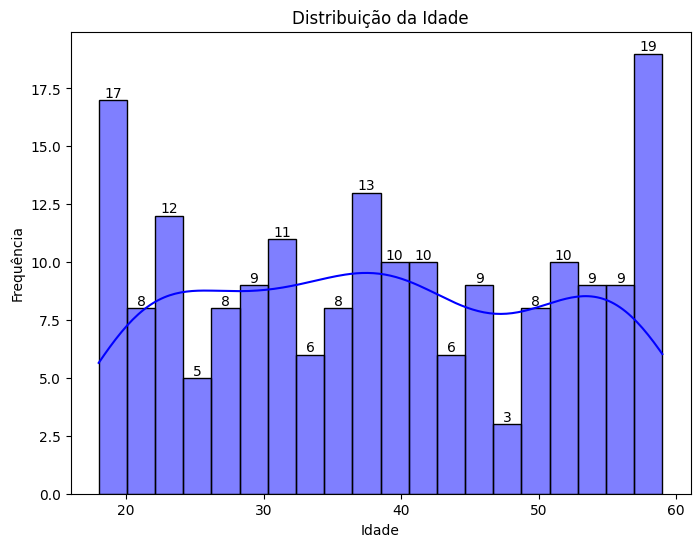

In [ ]:
# Verificando a sua distribuicao
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Idade'], kde=True, bins=20, color='blue')

# Adicionar valores nas barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()


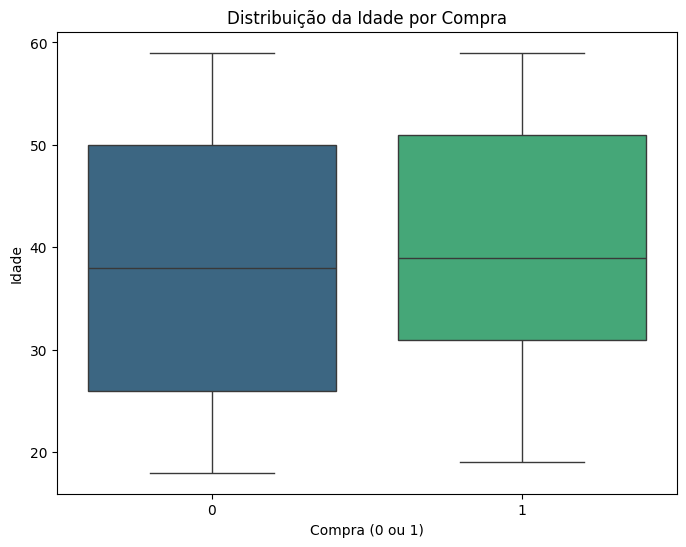

In [ ]:
#Verificando a relação entre Idade e a Compra
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Compra (0 ou 1)'], y=df['Idade'], palette='viridis')
plt.title("Distribuição da Idade por Compra")
plt.xlabel("Compra (0 ou 1)")
plt.ylabel("Idade")
plt.show()


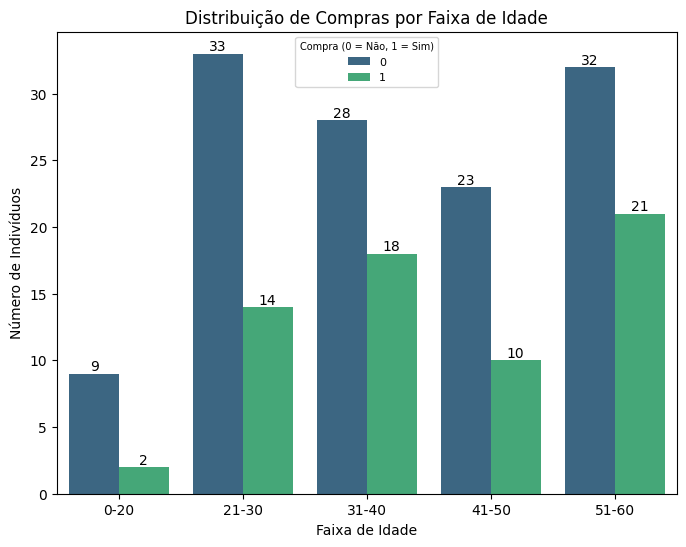

In [ ]:
# Analisando a relação entre a Idade e sua influência na Compra.

# Determinando intervalo
bins_idade = [0, 20, 30, 40, 50, 60]
labels_idade = ['0-20', '21-30', '31-40', '41-50', '51-60']

# Criando as faixas de idade
faixas_idade = pd.cut(df['Idade'], bins=bins_idade, labels=labels_idade, right=False)

# Fazendo a contagem de compras e não compras por faixa de idade
temp_idade_df = pd.DataFrame({'Faixa de Idade': faixas_idade, 'Compra (0 ou 1)': df['Compra (0 ou 1)']})

# Plotando o gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Faixa de Idade', hue='Compra (0 ou 1)', data=temp_idade_df, palette='viridis')

# Adicionando valores em cima de cada barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Compras por Faixa de Idade")
plt.xlabel("Faixa de Idade")
plt.ylabel("Número de Indivíduos")
plt.legend(title="Compra (0 = Não, 1 = Sim)", fontsize=8, title_fontsize=7)
plt.show()




- Analisando a coluna **Renda Anual (em $)**

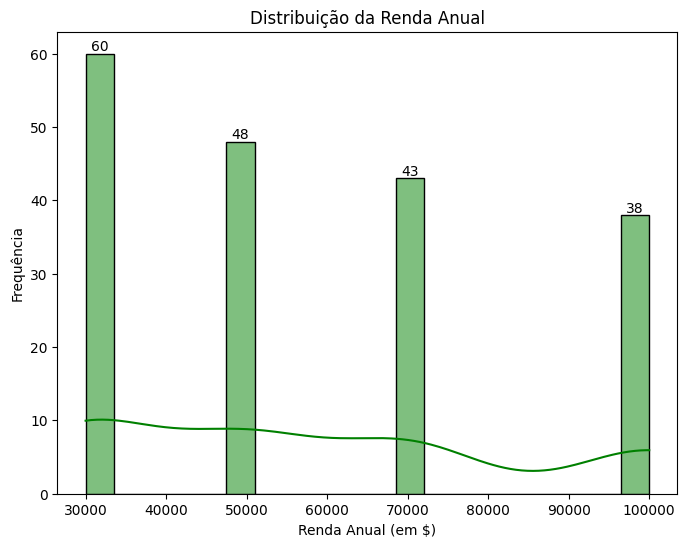

In [ ]:
# Verificando sua distribuição
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Renda Anual (em $)'], kde=True, bins=20, color='green')

# Adicionando valores em cima de cada barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição da Renda Anual")
plt.xlabel("Renda Anual (em $)")
plt.ylabel("Frequência")
plt.show()


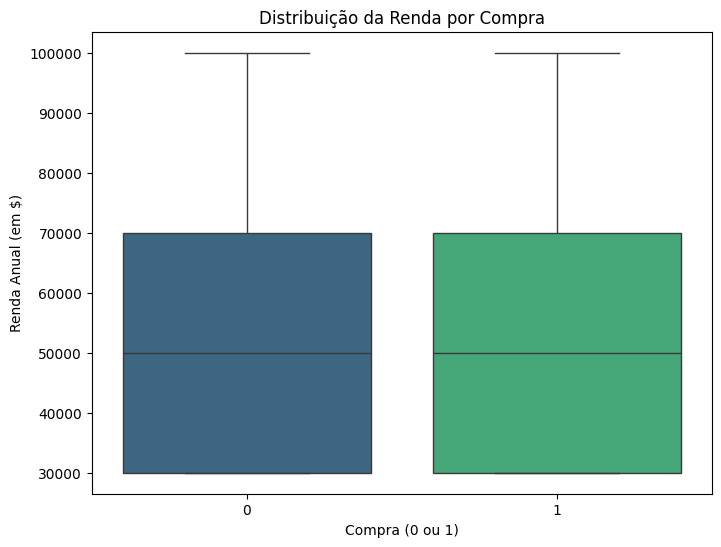

In [ ]:
#Verificando a relação entre Renda e a Compra
plt.figure(figsize=(8, 6))
sns.boxplot(x='Compra (0 ou 1)', y='Renda Anual (em $)', data=df, palette='viridis')
plt.title("Distribuição da Renda por Compra")
plt.xlabel("Compra (0 ou 1)")
plt.ylabel("Renda Anual (em $)")
plt.show()


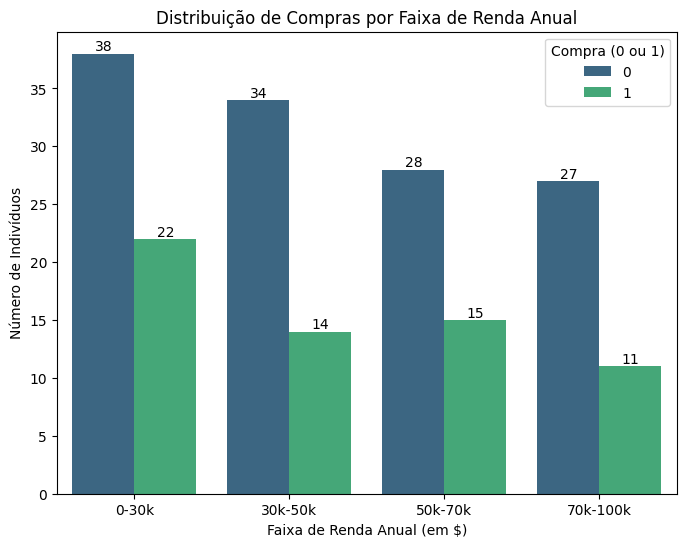

In [ ]:
# Analisando como a renda influencia a decisão de compra

# Determinando os intervalos
faixas_renda = [0, 30000, 50000, 70000, 100000]
labels = ['0-30k', '30k-50k', '50k-70k', '70k-100k']

# Criando as faixas de idade
faixa_renda = pd.cut(df['Renda Anual (em $)'], bins=faixas_renda, labels=labels, include_lowest=True)


# Criando o gráfico
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=faixa_renda, hue=df['Compra (0 ou 1)'], palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )


plt.title("Distribuição de Compras por Faixa de Renda Anual")
plt.xlabel("Faixa de Renda Anual (em $)")
plt.ylabel("Número de Indivíduos")
plt.show()


- Analisando a coluna **Gênero**

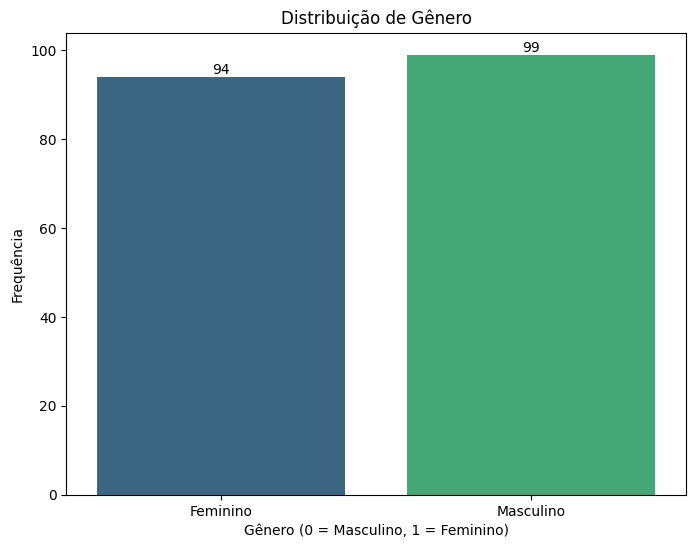

In [ ]:
# Analisando as ocorrências por gênero
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gênero', data=df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha='center', va='bottom', fontsize=10
    )

plt.title("Distribuição de Gênero")
plt.xlabel("Gênero (0 = Masculino, 1 = Feminino)")
plt.ylabel("Frequência")
plt.show()

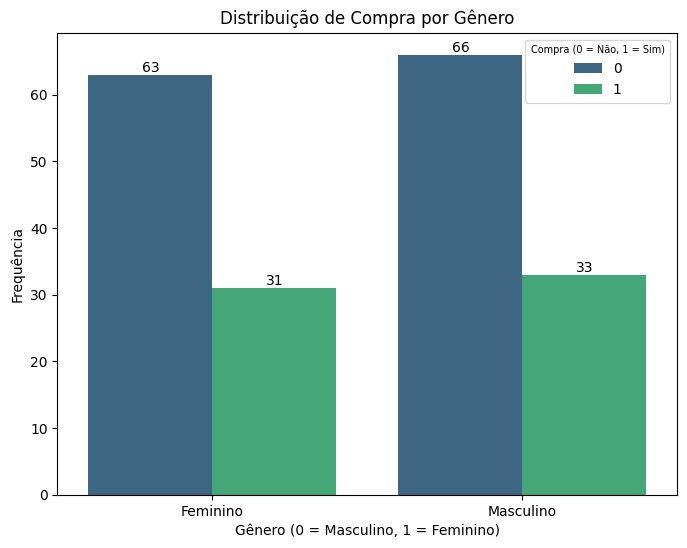

In [ ]:
# Verificando a relação entre Gênero e a Compra

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gênero', hue='Compra (0 ou 1)', data=df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Compra por Gênero")
plt.xlabel("Gênero (0 = Masculino, 1 = Feminino)")
plt.ylabel("Frequência")
plt.legend(title="Compra (0 = Não, 1 = Sim)", fontsize=10, title_fontsize=7)
plt.show()


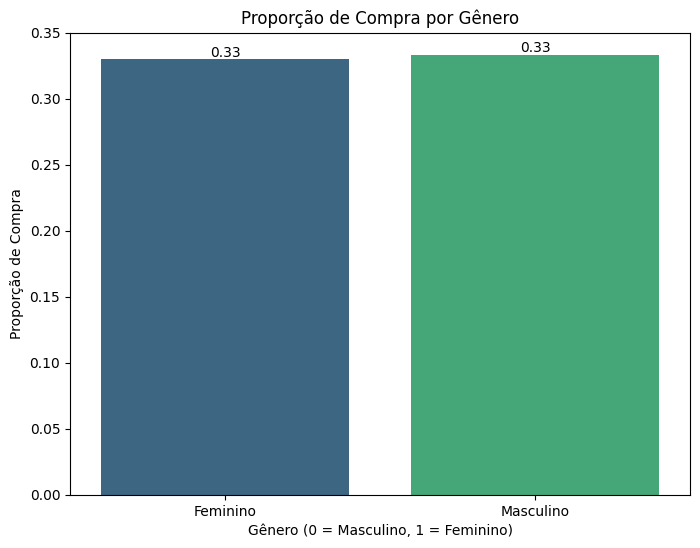

In [ ]:
# Verificando as proporções de compra por cada gênero

proporcoes = df.groupby('Gênero')['Compra (0 ou 1)'].mean()

# Gráfico para proporções
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=proporcoes.index, y=proporcoes.values, palette='viridis')


for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

plt.title("Proporção de Compra por Gênero")
plt.xlabel("Gênero (0 = Masculino, 1 = Feminino)")
plt.ylabel("Proporção de Compra")
plt.show()


- Analisando a coluna **Tempo no Site (min)**





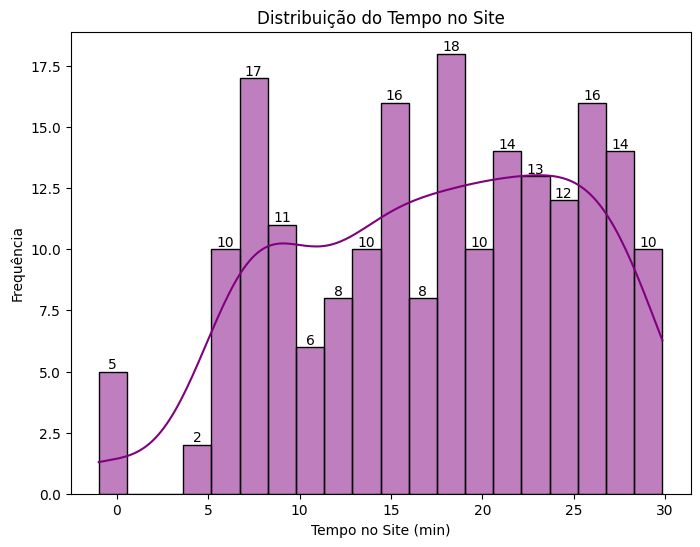

In [ ]:
# Verificando sua distribuição

plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Tempo no Site (min)'], kde=True, bins=20, color='purple')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição do Tempo no Site")
plt.xlabel("Tempo no Site (min)")
plt.ylabel("Frequência")
plt.show()


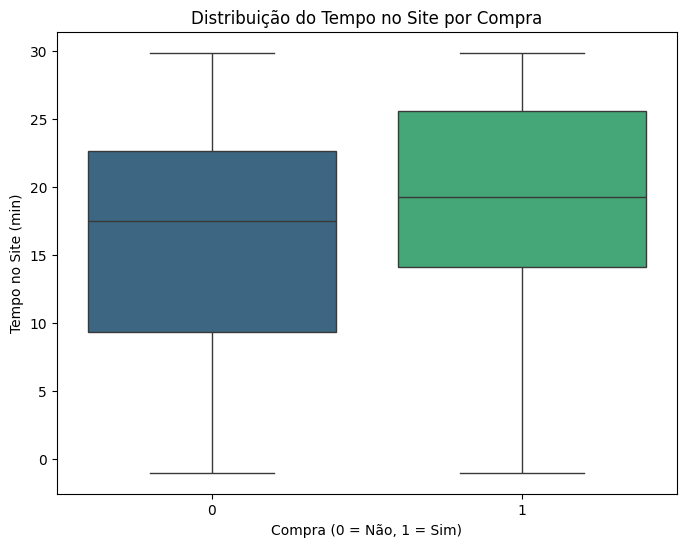

In [ ]:
# Verificando a relação entre Tempo no Site e a Compra

plt.figure(figsize=(8, 6))
sns.boxplot(x='Compra (0 ou 1)', y='Tempo no Site (min)', data=df, palette='viridis')
plt.title("Distribuição do Tempo no Site por Compra")
plt.xlabel("Compra (0 = Não, 1 = Sim)")
plt.ylabel("Tempo no Site (min)")
plt.show()


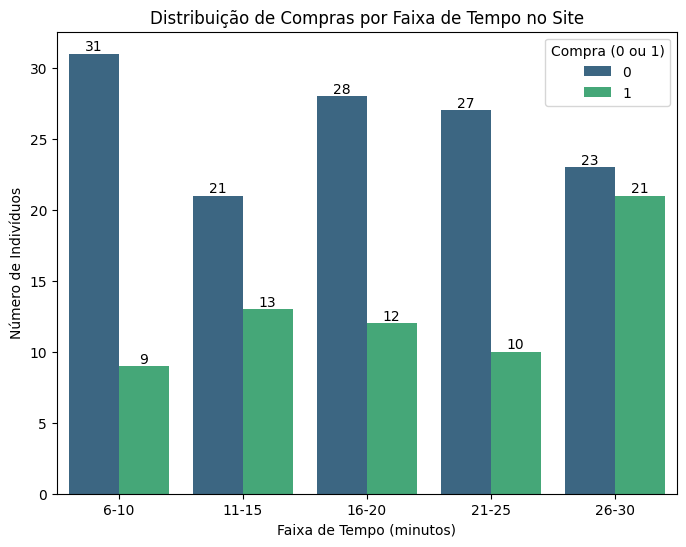

In [ ]:
# Verificando se o Tempo no Site Influência a Compra

# Definindo faixas
bins = [5, 10, 15, 20, 25, 30]
labels = [ '6-10', '11-15', '16-20', '21-25', '26-30']

# Criando faixas
faixas_tempo = pd.cut(df['Tempo no Site (min)'], bins=bins, labels=labels, right=False)

# Calculando a contagem
temp_df = pd.DataFrame({'Faixa de Tempo': faixas_tempo, 'Compra (0 ou 1)': df['Compra (0 ou 1)']})

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Faixa de Tempo', hue='Compra (0 ou 1)', data=temp_df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Compras por Faixa de Tempo no Site")
plt.xlabel("Faixa de Tempo (minutos)")
plt.ylabel("Número de Indivíduos")
plt.show()


- Analisando a coluna **Anúncio Clicado**



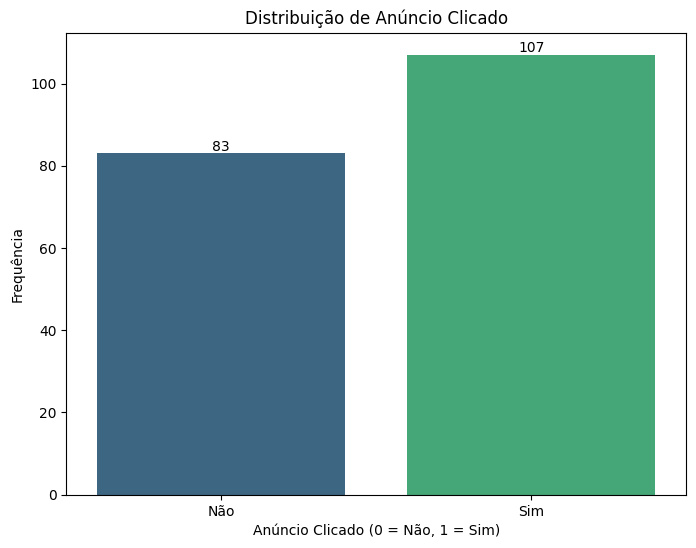

In [ ]:
#Analisando as ocorrências por de cliques em anúncios

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Anúncio Clicado', data=df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Anúncio Clicado")
plt.xlabel("Anúncio Clicado (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.show()

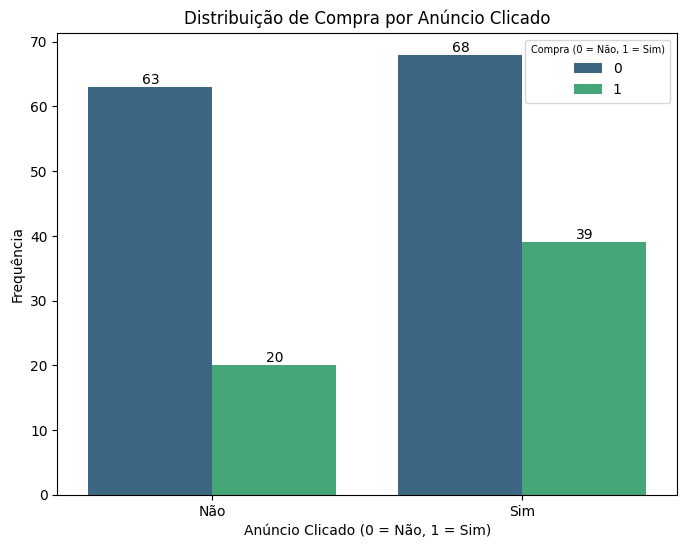

In [ ]:
# Verificando a relação entre Anúncio Clicado e a Compra

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Anúncio Clicado', hue='Compra (0 ou 1)', data=df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Compra por Anúncio Clicado")
plt.xlabel("Anúncio Clicado (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.legend(title="Compra (0 = Não, 1 = Sim)",  fontsize=10, title_fontsize=7)
plt.show()


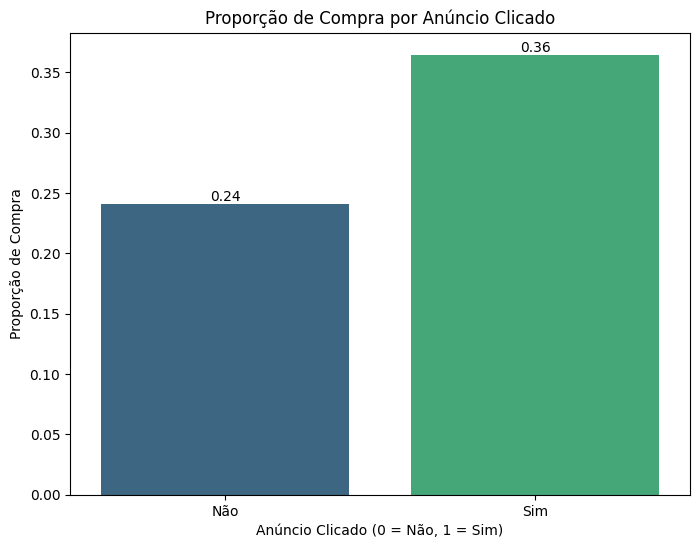

In [ ]:
# Verificando as proporções de Compra por Anúncio Clicado

proporcoes = df.groupby('Anúncio Clicado')['Compra (0 ou 1)'].mean()

# Gráfico para proporções
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=proporcoes.index, y=proporcoes.values, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

plt.title("Proporção de Compra por Anúncio Clicado")
plt.xlabel("Anúncio Clicado (0 = Não, 1 = Sim)")
plt.ylabel("Proporção de Compra")
plt.show()


- Analisando a coluna **Compra (O ou 1)**


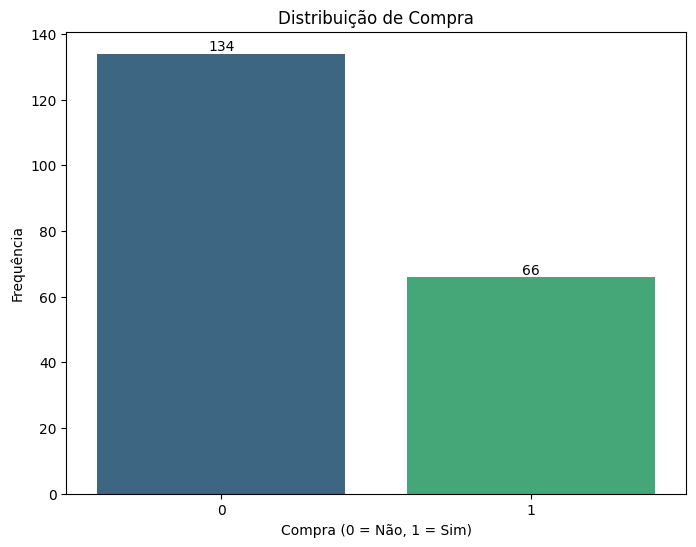

In [ ]:
# Verificando sua distribuição

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Compra (0 ou 1)', data=df, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=10
        )

plt.title("Distribuição de Compra")
plt.xlabel("Compra (0 = Não, 1 = Sim)")
plt.ylabel("Frequência")
plt.show()


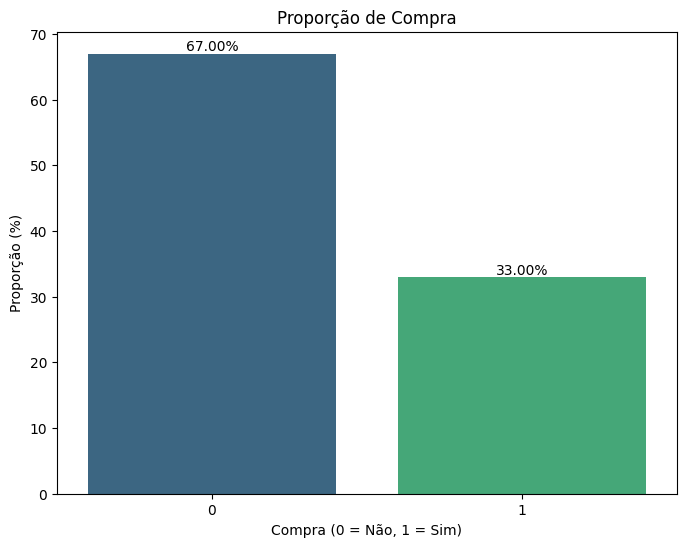

In [ ]:
# Verificando a proproção de compradores e não compradores

proporcoes_compra = df['Compra (0 ou 1)'].value_counts(normalize=True) * 100

# Gráfico para proporções
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=proporcoes_compra.index, y=proporcoes_compra.values, palette='viridis')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}%",
        ha='center', va='bottom', fontsize=10  #
    )

plt.title("Proporção de Compra")
plt.xlabel("Compra (0 = Não, 1 = Sim)")
plt.ylabel("Proporção (%)")
plt.show()


Outro recurso importante para entender as relações entre as variáveis numéricas de um conjunto de dados é a [**Matriz de Correlação**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

A correlação é uma ***medida estatística*** que indica a relação entre duas variáveis, variando de -1 a 1. A interpretação dos valores da correlação é a seguinte:

- +1 indica **correlação positiva perfeita**, ou seja, as variáveis aumentam juntas de forma linear e em uma proporção constante.
- 0 indica **nenhuma correlação linear**, ou seja, não há relação linear entre as variáveis.
- -1 indica **correlação negativa perfeita**, ou seja, quando uma variável aumenta, a outra diminui de forma linear e proporcional.

Logo, uma matriz de correlação pode ajudar a identificar relações lineares entre variáveis numéricas.


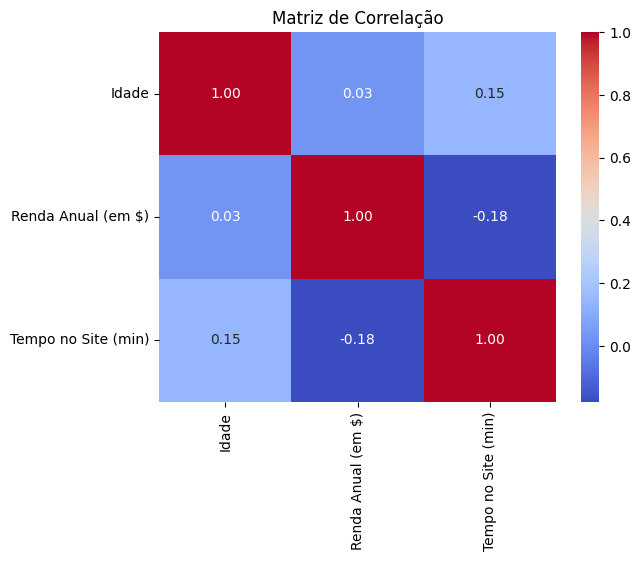

In [ ]:
# Gerando a matriz
corr = df[['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


- Uma outra maneira de analisar esses dados é por meio de um scatter plot, chamado de **gráfico de dispersão**.
  - Esse tipo de gráfico tem como objetivo principal visualizar a relação entre duas variáveis, onde cada eixo é representado por uma variável.
- Neste caso, a ideia é investigar se existe alguma relação entre as colunas Idade e Tempo no Site.

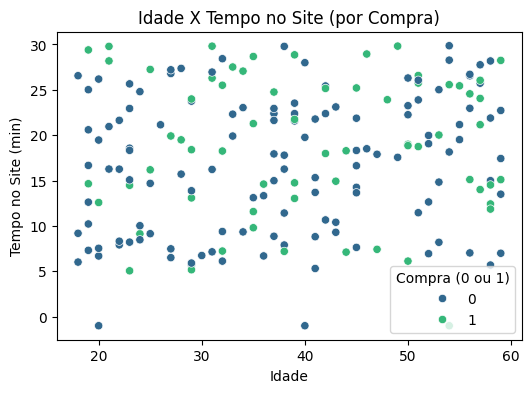

In [ ]:
# Analisando a Idade X Tempo no Site

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Idade', y='Tempo no Site (min)', hue='Compra (0 ou 1)', palette='viridis')
plt.title("Idade X Tempo no Site (por Compra)")
plt.show()

- A princípio, a distribuição dos pontos para a variável Compra (0 ou 1) está bastante dispersa, o que pode indicar que Idade e Tempo no Site não são bons preditores para a variável Compra

Existe uma biblioteca em Python chamada [***ydata-profiling***](https://github.com/ydataai/ydata-profiling), que permite realizar uma análise exploratória automatizada dos dados, gerando relatórios que oferecem insights valiosos sobre o dataset em questão.

A seguir, utilizarei essa ferramenta para demonstrar como ela pode ser aplicada na análise de dados.

- Não se esqueça de instalar a biblioteca com o comando pip install.

O processo gerará um arquivo HTML contendo informações detalhadas e úteis sobre os dados, proporcionando uma visão abrangente do dataset analisado.

Seu uso é ideal quando você deseja obter uma visão inicial e abrangente do seu conjunto de dados.





In [ ]:
# Importando o ProfileReport do ydata-profiling
!pip install ydata-profiling

from ydata_profiling import ProfileReport

# Gerando a visualização
profile = ProfileReport(df, title="dados_compra_casa")

# Criando o relatório
profile.to_file("dados_compra.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]



---



# **2. Pré-Processamento**
Após realizar a análise exploratória e obter uma compreensão mais aprofundada sobre os dados, é essencial realizar o pré-processamento para garantir que os modelos de aprendizado de máquina a serem desenvolvidos não sejam comprometidos por problemas nos dados.

Durante a análise exploratória, diversos pontos podem ser identificados que necessitam de tratamento. Vamos abordar três aspectos principais que precisam de atenção:

- **2.1 Lidar com valores nulos**
  - Podem prejudicar o treinamento de modelos
- **2.2 Conversão variáveis categóricas**
  - Precisam ser convertidas para formatos numéricos para que possam ser utilizadas pelos algoritmos de aprendizado de máquina
- **2.3 Lidar com valores inconsistentes**
  - É essencial corrigir ou remover esses valores para evitar que o modelo seja treinado com dados errôneos, o que pode gerar previsões imprecisas


In [ ]:
df = pd.read_csv('Dataset.csv')
print(df.head())

   Idade  Renda Anual (em $)    Gênero  Tempo no Site (min) Anúncio Clicado  \
0   29.0             30000.0  Feminino             5.741706             Não   
1   58.0             50000.0  Feminino            21.885505             Sim   
2   50.0             70000.0  Feminino             6.121339             Não   
3   21.0            100000.0  Feminino            16.264925             Não   
4   59.0             50000.0  Feminino            28.235667             Sim   

   Compra (0 ou 1)  
0                0  
1                0  
2                1  
3                0  
4                1  


- **2.1 Lidando com valores nulos**
  - Durante a análise exploratória, foi observado que algumas colunas apresentam valores nulos. Agora, vamos identificar quais são essas colunas e entender esse problema.

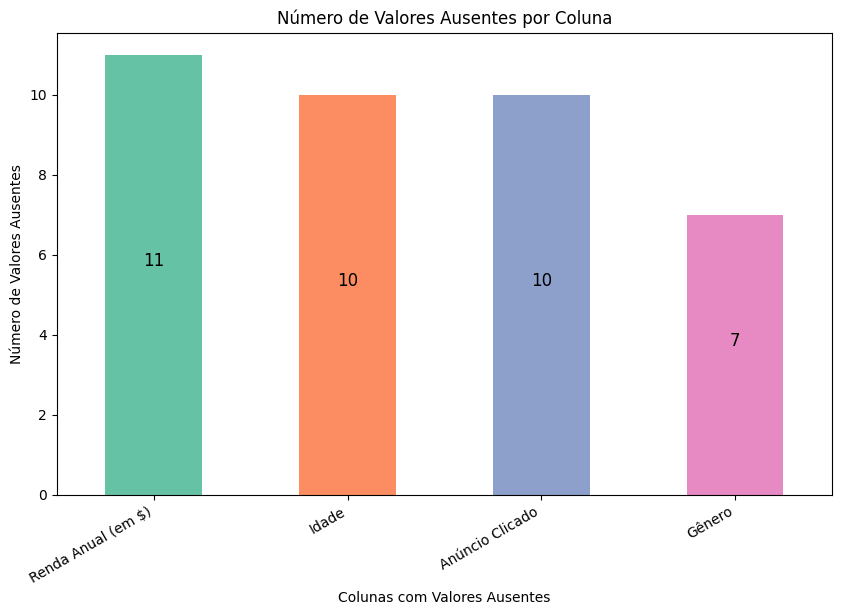

In [ ]:
# Contagem de valores ausentes
missing_data = df.isnull().sum()

missing_info = pd.DataFrame({"Missing Values": missing_data})

# Filtrar  colunas com valores ausentes
missing_info_filtered = missing_info[missing_info["Missing Values"] > 0]

# Verificar se há colunas com valores ausentes
if not missing_info_filtered.empty:
    plt.figure(figsize=(10, 6))

    colors = sns.color_palette("Set2", len(missing_info_filtered))

    # Plotando o gráfico de barras
    ax = missing_info_filtered.sort_values("Missing Values", ascending=False)["Missing Values"].plot(
        kind='bar', color=colors)

    plt.title("Número de Valores Ausentes por Coluna")
    plt.ylabel("Número de Valores Ausentes")
    plt.xlabel("Colunas com Valores Ausentes")
    plt.xticks(rotation=30, ha='right')

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2, p.get_height()/2),
                    ha='center', va='center',
                    fontsize=12, color='black',
                    xytext=(0, 10), textcoords='offset points')

    plt.show()
else:
    print("Nenhuma coluna possui valores ausentes.")


A identificação dos valores nulos é fundamental, pois nos permite entender com precisão a origem do problema, possibilitando a definição das abordagens mais adequadas para resolvê-lo de maneira eficaz. A seguir, irei tratar esses valores.

Preenchendo variáveis numéricas com a médiana
  - Renda Anual (em $)
  - Idade


In [ ]:
# Preenchendo valores ausentes com a mediana
df['Renda Anual (em $)'] = df['Renda Anual (em $)'].fillna(df['Renda Anual (em $)'].median())
df['Idade'] = df['Idade'].fillna(df['Idade'].median())


- Preenchendo variáveis categóricas com a moda
  - Gênero
  - Anúncio Clicado


In [ ]:
# Preenchendo valores ausentes com a moda
df['Gênero'] = df['Gênero'].fillna(df['Gênero'].mode()[0])
df['Anúncio Clicado'] = df['Anúncio Clicado'].fillna(df['Anúncio Clicado'].mode()[0])


- Após realizar esses ajustes, irei verificar se ainda há algum dado ausente no dataframe.

In [ ]:
# Contando valores ausentes por coluna
missing_values = df.isna().sum()
print(missing_values)

# Contando o total de valores ausentes
total_missing = df.isna().sum().sum()
print(f"Total de valores ausentes no DataFrame: {total_missing}")


Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64
Total de valores ausentes no DataFrame: 0


A abordagem de substituição pelos valores da média ou moda é apenas uma entre várias possibilidades. Devido à simplicidade do conjunto de dados, essa estratégia é mais do que suficiente para obter resultados satisfatórios.

Outras abordagens que poderiam ser utilizadas incluem:
  - **Imputação por KNN**: Nesse método, os valores ausentes são preenchidos com base nos valores dos vizinhos mais próximos, considerando as características semelhantes entre as amostras.
  - **Imputação por regressão**: Aqui, utiliza-se um modelo de regressão para prever os valores ausentes com base nas outras variáveis do conjunto de dados.
  - **Remoção dos registros com valores ausentes**: Uma abordagem mais arriscada seria eliminar as linhas que contêm valores faltantes, embora isso possa resultar em perda de dados dependendo da quantidade de valores ausentes.

Outro ponto importante a ser tratado são as **variáveis categóricas**, e isso será abordado a seguir.





- **2.2 Convertendo variáveis categóricas**
  - Neste caso, a transformação foi realizada de forma manual, conforme mostrado no código abaixo.
    - Para os valores da coluna ***'Anúncio Clicado'***, os registros que possuiam os valores **'Não'** foram substituídos por **0**, e os registros que possuiam os valores **'Sim'** foram substituído por **1**.
    - Para os valores da coluna ***'Gênero'***, s registros que possuiam os valores **'Feminino'** foram substituídos por **1**, os registros que possuiam os valores **'Masculino'** foram substituído por **0**.
  - Existe também um método na biblioteca do Sckit-learn, chamado [**LabelEncoder**()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), que realiza a mesma transformação de variáveis categóricas para variáveis numéricas de maneira automatizada. O código para executar esse processo é o seguinte:
    - ***df['Gênero'] = label_encoder.fit_transform(df['Gênero'])***

In [ ]:
# Substituindo valores de 'Anúncio Clicado'
df['Anúncio Clicado'] = df['Anúncio Clicado'].map({'Não': 0, 'Sim': 1})

print("Coluna 'Anúncio Clicado' após a transformação:\n")
print(df[['Anúncio Clicado']].head())


Coluna 'Anúncio Clicado' após a transformação:

   Anúncio Clicado
0                0
1                1
2                0
3                0
4                1


In [ ]:
# Substituindo valores de 'Genero'
df['Gênero'] = df['Gênero'].str.strip().str.lower().map({'feminino': 1, 'masculino': 0})

print("Coluna 'Gênero' após a transformação:\n")
print(df[['Gênero']].head())

Coluna 'Gênero' após a transformação:

   Gênero
0       1
1       1
2       1
3       1
4       1


- Verificando se todas as alterações foram aplicadas corretamente

In [ ]:
print(df.head())


   Idade  Renda Anual (em $)  Gênero  Tempo no Site (min)  Anúncio Clicado  \
0   29.0             30000.0       1             5.741706                0   
1   58.0             50000.0       1            21.885505                1   
2   50.0             70000.0       1             6.121339                0   
3   21.0            100000.0       1            16.264925                0   
4   59.0             50000.0       1            28.235667                1   

   Compra (0 ou 1)  
0                0  
1                0  
2                1  
3                0  
4                1  


As transformações diretas mencionadas acima foram possíveis porque estamos lidando com variáveis binárias, como as colunas **Gênero** e **Anúncio Clicado** (que possuem os valores Sim/Não ou Masculino/Feminino).  

Quando temos atributos que podem assumir mais de dois valores, a abordagem recomendada é o **OneHotEncoder**. Esse método cria uma coluna para cada categoria e representa cada uma delas com valores binários (0 ou 1), tratando as categorias de forma independente. Por exemplo, para uma coluna com três categorias, o **OneHotEncoder** criaria três novas colunas, cada uma representando uma categoria.

Essa abordagem é importante porque evita que o modelo interprete erroneamente qualquer tipo de relação hierárquica ou ordem entre as categorias. Assim, garantimos que o modelo trate cada categoria de maneira independente, o que ajuda a evitar distorções nos resultados.

Por fim, é fundamental tratar os valores inconsistentes, e essa questão será abordada a seguir.





- **2.3 Tratando valores inconsistentes**
  - É fundamental lidar com dados inconsistentes antes de treinar um modelo de machine learning, pois isso pode impactar diretamente a qualidade do modelo.
  

In [ ]:
# Descricao
print(df.describe())

            Idade  Renda Anual (em $)      Gênero  Tempo no Site (min)  \
count  200.000000          200.000000  200.000000           200.000000   
mean    38.485000        57800.000000    0.470000            17.349090   
std     12.357724        24965.503838    0.500352             7.724088   
min     18.000000        30000.000000    0.000000            -1.000000   
25%     28.750000        30000.000000    0.000000            10.860240   
50%     38.000000        50000.000000    0.000000            18.197552   
75%     50.000000        70000.000000    1.000000            23.887341   
max     59.000000       100000.000000    1.000000            29.853484   

       Anúncio Clicado  Compra (0 ou 1)  
count       200.000000       200.000000  
mean          0.585000         0.330000  
std           0.493958         0.471393  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           1.000000         0.000000  
75%           1.000000         1.000000

Ao analisar o resumo estatístico dos dados, identificamos um valor inconsistente na coluna **"Tempo no Site (min)"**.
  - O valor mínimo registrado é -1, o que é ilógico para essa variável, uma vez que o tempo no site não pode ser negativo.

Vamos verificar quantas vezes ocorre esse valor negativo.

In [ ]:
# Verificando a quantidade de vezes que o valor -1 ocorOcorrência
print(df[df['Tempo no Site (min)'] < 0].shape[0])


5


A abordagem adotada foi substituir os valores negativos por valores nulos (NaN) e, em seguida, substituir esses valores nulos pela mediana.

In [ ]:
# Substituindo valores negativos por NaN
df.loc[df['Tempo no Site (min)'] < 0, 'Tempo no Site (min)'] = None

# Preenchendo valores ausentes com a mediana
df['Tempo no Site (min)'] = df['Tempo no Site (min)'].fillna(df['Tempo no Site (min)'].median())


A mediana foi escolhida em vez da média porque é menos sensível a eventuais **outliers** e **valores extremos**, por mais que nesse dataset não foram encontrar em grande quantidade tais problemas.

Em distribuições assimétricas ou com valores atípicos, a média pode ser distorcida, enquanto a mediana representa de forma mais precisa o comportamento central dos dados.

Isso garante que o preenchimento de valores ausentes seja mais robusto e representativo, evitando que valores extremos influenciem negativamente a análise ou o modelo.

- Por exemplo, imagine  que a coluna **"Tempo no Site (min)"** tenha um valor muito alto, como **1000 minutos**, podendo ser um outlier.
  - Nesse caso, a **média** seria influenciada por esse valor extremo, tornando-a mais alta do que a maioria dos valores na coluna.
  - A **mediana**, por outro lado, ainda refletiria melhor o comportamento central dos dados, pois ela não é afetada pelos outliers.



---



# **3. Construção do Modelo de Machine Learning**

Após realizar a **Análise Exploratória de Dados**, onde investigamos as características principais do conjunto de dados, identificamos padrões, outliers e relações entre as variáveis, passamos para a etapa de **Pré-Processamento**. Nessa fase, tratamos dados ausentes, inconsistências, e realizamos transformações nas variáveis para garantir que o modelo de machine learning receba dados limpos e prontos para análise.

Com essas etapas concluídas, temos uma base sólida para construir o modelo de machine learning. O próximo passo é selecionar um algoritmo adequado, treinar o modelo com os dados de treino e, finalmente, avaliar seu desempenho com os dados de teste. Isso nos permitirá fazer previsões e medir a eficácia do modelo na tarefa proposta.

Para a construção dos modelos, utilizaremos a biblioteca [**scikit-learn**](https://scikit-learn.org/stable/), uma das mais populares e amplamente utilizadas no campo de aprendizado de máquina.


Para isso, optei por adotar uma abordagem comparativa, na qual realizaremos a classificação utilizando diferentes modelos e, em seguida, analisaremos os resultados para determinar qual modelo oferece o melhor desempenho.

Cada modelo pode ter um desempenho diferente dependendo das características dos dados. Usando múltiplos modelos, você pode identificar qual se adapta melhor ao seu problema e evitar depender de um único modelo.

Alem disso, certos modelos, como as **árvores de decisão**, podem ser propensos ao overfitting se não forem controlados, enquanto outros, como a **regressão logística**, podem ter dificuldades em capturar relações mais complexas. Testar diferentes modelos pode ajudar a encontrar esse equilíbrio .

Foram utilizados quatro modelos para a classificação: **Regressão Logística**, **Árvore de Decisão**, **Random Forest** e **Rede Neural**.

- [**Regressão Logística**](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
  - Modelo linear amplamente utilizado para problemas de classificação bináriaEle tenta aprender a relação entre as variáveis independentes e a variável alvo, utilizando uma função logística (sigmoide) para prever probabilidades.
- [**Árvore de Decisão**](https://scikit-learn.org/stable/modules/tree.html)
  - Modelo não linear que divide os dados em diferentes ramos com base em perguntas simples. Ele cria uma estrutura hierárquica de decisões que facilita a interpretação e visualização.
- [**Random Forest**](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles)
  - Esse modelo treina várias árvores e, em seguida, faz a média das previsões, em casos de problemas de regressão, ou escolhe a classe mais frequente, no caso de problemas de classificação. Ele reduz o overfitting ao combinar várias árvores com diferentes subconjuntos de dados e características.
- [**Rede Neural (MLP)**](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
  - Esse modelo é uma rede neural artificial com múltiplas camadas de neurônios, cada uma realizando transformações não lineares nos dados.

In [ ]:
# Separando as variáveis independentes  e a variável alvo
X = df.drop(columns=['Compra (0 ou 1)'])
y = df['Compra (0 ou 1)']

# Divindindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo os tamanhos dos conjuntos
print("Tamanhos dos conjuntos:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print("=" * 70)

# Função para treinar o modelo, prever e calcular a acurácia
def treinar_e_avaliar_modelo(modelo, nome_modelo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)

    print(f"\n{nome_modelo}\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("=" * 70)

    return acuracia

resultados = []


# Regressão Logística
modelo_logistica = LogisticRegression(max_iter=500, random_state=42)
acuracia_logistica = treinar_e_avaliar_modelo(modelo_logistica, 'Regressão Logística')
resultados.append({
    'Modelo': 'Regressão Logística',
    'Acurácia': acuracia_logistica
})


# Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)
acuracia_arvore = treinar_e_avaliar_modelo(modelo_arvore, 'Árvore de Decisão')
resultados.append({
    'Modelo': 'Árvore de Decisão',
    'Acurácia': acuracia_arvore
})


# Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
acuracia_rf = treinar_e_avaliar_modelo(modelo_rf, 'Random Forest')
resultados.append({
    'Modelo': 'Random Forest',
    'Acurácia': acuracia_rf
})


# Rede Neural (MLP)
modelo_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
acuracia_mlp = treinar_e_avaliar_modelo(modelo_mlp, 'Rede Neural (MLP)')
resultados.append({
    'Modelo': 'Rede Neural (MLP)',
    'Acurácia': acuracia_mlp
})



Tamanhos dos conjuntos:
Treino: 140 amostras
Teste: 60 amostras

Regressão Logística

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60


Árvore de Decisão

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        35
           1       0.62      0.40      0.49        25

    accuracy                           0.65        60
   macro avg       0.64      0.61      0.61        60
weighted avg       0.64      0.65      0.63        60


Random Forest

              precision    recall  f1-score   support

           0       0.58      0.91      0.71        35
           1       0.40      0.08      0.13        25

    accuracy                           0.57        60
   mac

A função [**classification_report()**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) retorna um conjunto de métricas e algumas informações importantes para avaliar o desempenho de um modelo de classificação. Essas métricas ajudam a entender como o modelo está se comportando em relação a cada classe individualmente, além de fornecer uma visão geral de sua eficácia.

Sao elas:
- [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
  - é a proporção de previsões positivas corretas em relação ao total de previsões feitas como positivas.
- [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
  -  é a proporção de previsões positivas corretas em relação ao total de exemplos realmente positivos.
- [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
  - é a média harmônica entre a precisão e o recall, e é uma métrica que busca equilibrar a exatidão das previsões com a capacidade de capturar as instâncias positivas.
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
  - é a proporção de previsões corretas em relação ao total de exemplos. É uma métrica global que fornece uma visão geral de quão bem o modelo está classificando as amostras em todas as classes.
- Support
  - refere-se ao número de instâncias reais de uma classe no conjunto de dados. Ele mostra quantas vezes cada classe aparece no conjunto de dados de teste.
- Macro Average
  -  calcula a média das métricas (precisão, recall, F1-Score) para todas as classes, sem considerar o número de amostras em cada classe, isso é, trata todas as classes igualmente.
- Weighted Average
  - é média das métricas para todas as classes, mas leva em consideração o número de instâncias de cada classe


Agora, vamos realizar uma comparação entre os diferentes modelos de classificação que treinamos, a fim de avaliar qual apresenta o melhor desempenho em termos de acurácia.

Para isso, criaremos um DataFrame contendo os resultados de cada modelo, incluindo a acurácia obtida durante o teste.

| Modelo                  | Acurácia |
|-------------------------|----------|
| Regressão Logística     | 0.5833   |
| Árvore de Decisão       | 0.65     |
| Random Forest           | 0.5667   |
| Rede Neural (MLP)       | 0.5833   |
|-------------------------|----------|


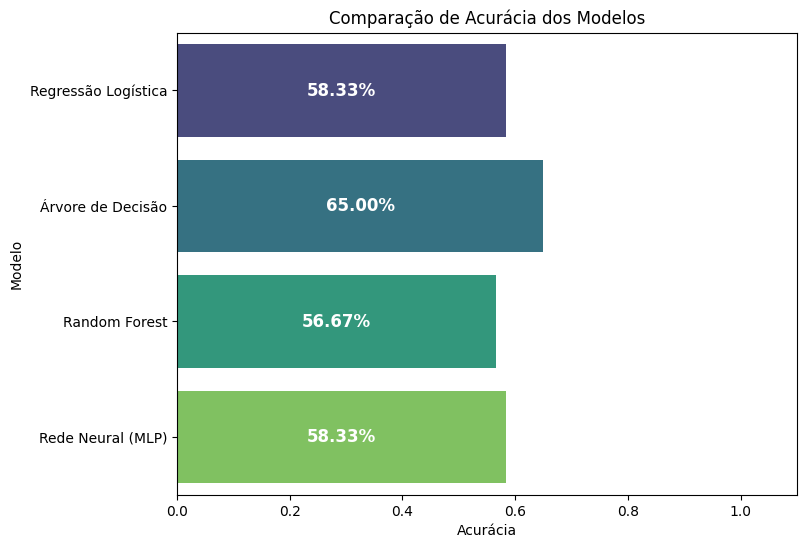

In [ ]:

# Comparação de Modelos
df_resultados = pd.DataFrame(resultados)

df_resultados['Acurácia'] = df_resultados['Acurácia'].round(4)

print("=======================================")
print("| Modelo                  | Acurácia |")
print("|-------------------------|----------|")


for index, row in df_resultados.iterrows():
    print(f"| {row['Modelo']:<23} | {row['Acurácia']:<8} |")

print("|-------------------------|----------|")
print("=======================================")

plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Acurácia', y='Modelo', data=df_resultados, palette='viridis', legend=False)

plt.title("Comparação de Acurácia dos Modelos")
plt.xlabel("Acurácia")
plt.ylabel("Modelo")
plt.xlim(0, 1.1)

for p in ax.patches:
    ax.annotate(f'{p.get_width()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='white', weight='bold')
plt.show()

Vamos analisar os resultados e com isso a performace de cada modelo:
- **Regressão Logística**
  - ***Acurácia***: 0.5833
  - Significa que o modelo acertou aproximadamente 58% das previsões no conjunto de teste.

- **Árvore de Decisão**
  - ***Acurácia***: 0.65
  - Foi o modelo que teve o melhor desempenho entre os modelos testados.Embora tenha se saído melhor do que os outros modelos, a árvore de decisão pode ser propensa a **overfitting**, especialmente se o modelo não for bem podado ou ajustado. Isso significa que ela pode ter "decidido" demais com base nas especificidades dos dados de treino.

- **Random Forest**
  - ***Acurácia***: 0.5667
  - Mesmo sendo uma técnica mais robusta e composta por múltiplas árvores de decisão, o desempenho do Random Forest neste caso não foi tão bom comparado com os demais.

- **Rede Neural (MLP)**
  - ***Acurácia***: 0.5833
  - Esse resultado pode indicar que, para esse conjunto de dados, a rede neural não foi capaz de oferecer uma vantagem em relação à regressão logística.

  ## **Conclusão**
  - **Melhor Desempenho**: Árvore de Decisão
  - **Piores desempenhos**: Random Forest e Rede Neural (MLP)

## Agora, irei realizar as mesmas comparações entre os modelos, mas utilizando **validação cruzada** para verificar se há melhorias nos resultados obtidos.

**Por que usar validação cruzada?**

- Quando usamos apenas uma divisão treino-teste, o desempenho do modelo pode ser altamente influenciado pela forma como os dados são divididos. Ou seja, dependendo da divisão, o modelo pode apresentar uma performance boa ou ruim. A [**validação cruzada**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) oferece uma avaliação mais robusta, pois ela treina e avalia o modelo várias vezes em diferentes subconjuntos dos dados. Isso resulta em uma estimativa mais consistente e precisa do desempenho do modelo.

- Além disso, a validação cruzada ajuda a detectar problemas como o **overfitting**, que ocorre quando o modelo se ajusta excessivamente aos dados de treino e não generaliza bem para dados não vistos. Isso é especialmente importante quando o conjunto de dados é pequeno, pois garante que o modelo aprenda de maneira eficaz e não memorize os dados.

- Para modelos como **Árvore de Decisão**, **Random Forest** e **MLP**, que podem ter um desempenho altamente variável dependendo da divisão dos dados, a validação cruzada oferece uma avaliação mais estável e confiável, uma vez que o modelo será treinado e avaliado em várias divisões diferentes.

**Quando a validação cruzada pode não ser necessária?**

- A única situação em que a validação cruzada pode não ser necessária é quando os dados são muito grandes e o tempo de treinamento se torna um fator limitante. Em grandes conjuntos de dados, a avaliação em uma única divisão treino-teste pode ser suficientemente estável para estimar o desempenho do modelo. No entanto, mesmo com grandes conjuntos de dados, a validação cruzada ainda é útil para evitar o overfitting e garantir que o modelo tenha uma boa capacidade de generalização.

**Desbalanceamento de classes e validação cruzada**
- Em problemas com desbalanceamento de classes, onde uma classe tem significativamente mais exemplos do que a outra, os modelos podem se tornar tendenciosos, favorecendo a classe majoritária e negligenciando a classe minoritária. A **validação cruzad** pode ajudar a mitigar esse problema, pois ela garante que o modelo seja avaliado de maneira consistente em diferentes subconjuntos dos dados. Isso permite que o modelo seja exposto a exemplos das duas classes de forma mais equilibrada, melhorando sua capacidade de aprender e generalizar para ambas as classes.
- Além disso, a validação cruzada proporciona uma avaliação mais detalhada do modelo, permitindo identificar variações no desempenho em diferentes divisões dos dados. Isso é particularmente importante em cenários de desbalanceamento de classes, pois pode ajudar a identificar se o modelo está apresentando resultados satisfatórios em todas as partes dos dados ou se está sendo tendencioso devido à distribuição desigual das classes

A responsavel por realizar todo esse papel é a função [***cross_val_score***](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) do **scikit-learn** que realiza automaticamente os passos principais da validação cruzada, dividindo os dados, treinando o modelo e avaliando seu desempenho.


Resultados da Validação Cruzada::

| Modelo                  | Acurácia Média | Desvio Padrão |
|-------------------------|----------------|---------------|
| Regressão Logística     | 0.6650         | 0.0200        |
| Árvore de Decisão       | 0.5450         | 0.0245        |
| Random Forest           | 0.6000         | 0.0652        |
| Rede Neural (MLP)       | 0.6700         | 0.0100        |


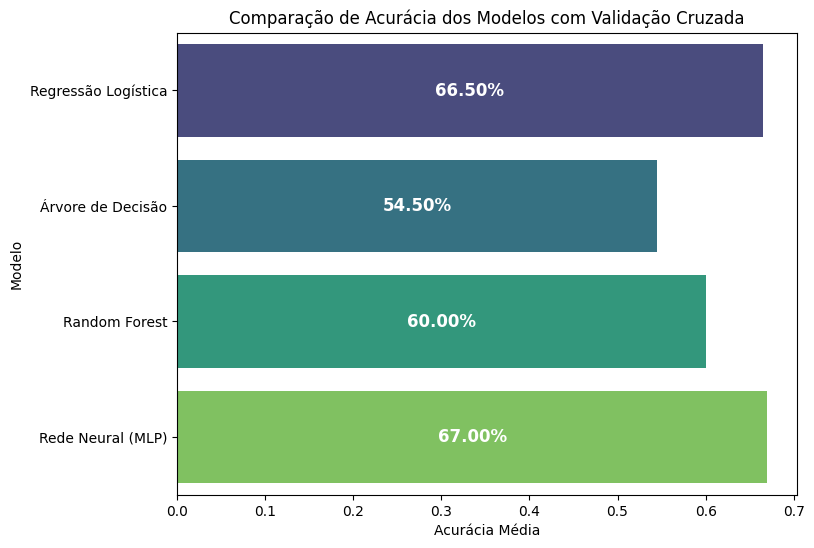

In [ ]:
resultados_cv = []

# Configurando os modelos
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=500, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Rede Neural (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Número de folds para a validação cruzada
k_folds = 5

print("=================================================================")
print("Resultados da Validação Cruzada::")


print("\n| Modelo                  | Acurácia Média | Desvio Padrão |")
print("|-------------------------|----------------|---------------|")

# Aplicando a validação cruzada para cada modelo
for nome, modelo in modelos.items():

    scores = cross_val_score(modelo, X, y, cv=k_folds, scoring='accuracy')

    resultados_cv.append({
        "Modelo": nome,
        "Acurácia Média": scores.mean(),
        "Desvio Padrão": scores.std()
    })

    print(f"| {nome:<23} | {scores.mean():<14.4f} | {scores.std():<13.4f} |")

print("=================================================================")

df_resultados_cv = pd.DataFrame(resultados_cv)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Acurácia Média', y='Modelo', data=df_resultados_cv, palette='viridis')
plt.title("Comparação de Acurácia dos Modelos com Validação Cruzada")
plt.xlabel("Acurácia Média")
plt.ylabel("Modelo")

for p in ax.patches:
    ax.annotate(f'{p.get_width()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.show()


Vamos analisar os resultados obtidos com a **validação cruzada**  e com isso a performace de cada modelo:
- **Regressão Logística**
  - ***Acurácia Média***: 0.6650
    - Podemos observar que validação cruzada ajudou a melhorar significativamente a acurácia do modelo em relação a obtida anteriormente (0.5833).
  - ***Desvio Padrão***: 0.0200

- **Árvore de Decisão**
  - ***Acurácia Média***: 0.5450
    - Podemos observar que validação cruzada piorou a acurácia do modelo em relação a obtida anteriormente (0.65).
  - ***Desvio Padrão***: 0.0245

- **Random Forest**
  - ***Acurácia Média***: 0.6000
    - Podemos observar que validação cruzada ajudou a melhorar ligeiramente a acurácia do modelo em relação a obtida anteriormente (0.5667).
  - ***Desvio Padrão***: 0.0652

- **Rede Neural (MLP)**
  - ***Acurácia Média***: 0.6700
    - O MLP foi o modelo que mais se beneficiou da validação cruzada, com uma melhoria significativa na acurácia, sendo o de melhor desempenho dentro os demais modelos, ainda mais comparado com o seu próprio valor obtido anteriormente (0.5833).
  - ***Desvio Padrão***: 0.0100


  ## **Conclusão**
  - **Melhor Desempenho**: Rede Neural (MLP)
  - **Pior Desempenho**: Árvore de Decisão

Abaixo, apresento um gráfico que compara as acurácias dos modelos de classificação, utilizando as duas abordagens citadas: com e sem validação cruzada.



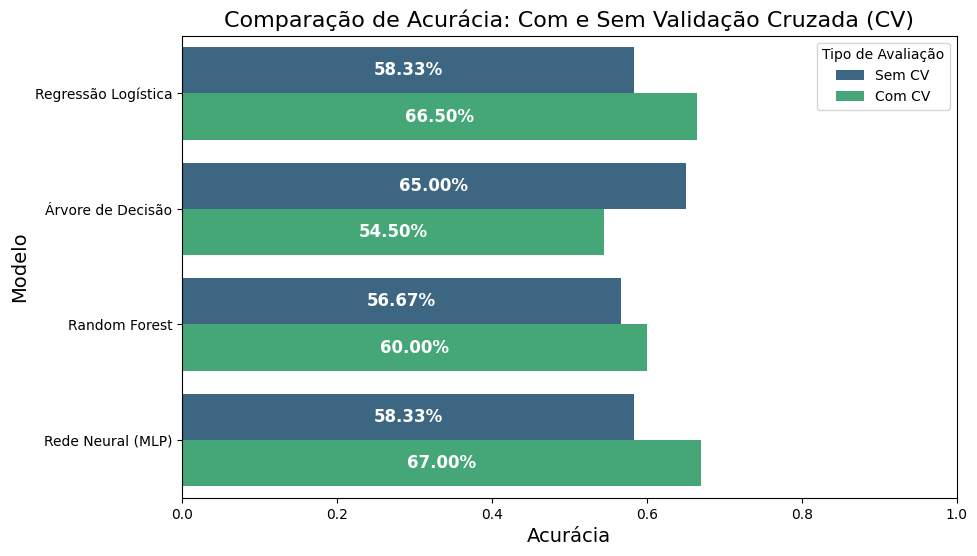

In [ ]:
# Adicionando coluna
df_resultados['Tipo de Avaliação'] = 'Sem CV'
df_resultados_cv['Tipo de Avaliação'] = 'Com CV'

df_resultados_cv.rename(columns={'Acurácia Média': 'Acurácia'}, inplace=True)

# Conctenando os DataFrames
df_comparacao = pd.concat([df_resultados[['Modelo', 'Acurácia', 'Tipo de Avaliação']],
                           df_resultados_cv[['Modelo', 'Acurácia', 'Tipo de Avaliação']]])

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Acurácia', y='Modelo', hue='Tipo de Avaliação', data=df_comparacao, palette='viridis')

plt.title("Comparação de Acurácia: Com e Sem Validação Cruzada (CV)", fontsize=16)
plt.xlabel("Acurácia", fontsize=14)
plt.ylabel("Modelo", fontsize=14)
plt.xlim(0, 1)

for p in ax.patches:
    acuracia = p.get_width()

    if acuracia > 0:
        ax.annotate(f'{acuracia*100:.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.show()




---



# **4. Ajustando Hiperparâmetros**

Os **hiperparâmetros** desempenham um papel crucial no desempenho dos modelos de aprendizado de máquina. Diferentemente dos parâmetros aprendidos durante o treinamento (como os pesos de uma rede neural), os hiperparâmetros são configurados antes do treinamento e afetam diretamente como o modelo se ajusta aos dados

Escolhas inadequadas podem levar a modelos com baixo desempenho, enquanto a otimização correta pode melhorar significativamente os resultados.

## **Importância dos Hiperparâmetros**

Hiperparâmetros como o número de árvores em uma Random Forest, o número de neurônios em uma camada de uma rede neural, ou a taxa de aprendizado em um otimizador são fundamentais para determinar:
  - A **capacidade de generalização**, isso é, hiperparâmetros mal ajustados podem levar a overfitting (quando o modelo se ajusta demais aos dados de treino) ou underfitting (quando o modelo não captura padrões suficientes nos dados).
  - O **desempenho geral do modelo**, isso é, ajustes finos nos hiperparâmetros podem impactar diretamente métricas como acurácia, precisão ou F1-score.

## **Busca em Grande**
Uma ferramenta bastante conhecida para essa abordagem é o **Grid Search**, nela é feita uma busca exaustiva de todas as combinações possíveis de valores para os hiperparâmetros definidos, com o intuito de garantir que a melhor combinação dentro do espaço de busca será encontrada.

A biblioteca **Scikit-learn** oferece essa implementação atraves do [**GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), facilitando o uso no dia a dia.

A principal **desvantagem** dessa abordagem é que pode ser muito demorado, principalmente se o espaço de pesquisa for grande. Como o Dataset do nosso desafio é pequeno, isso não será um problema.


## **Escolha dos Hiperparâmetros**

A escolha dos hiperparâmetros para os modelos de aprendizado de máquina é um passo fundamental no processo de otimização de desempenho.

Cada modelo possui configurações específicas que influenciam diretamente sua capacidade de generalização e precisão.

A escolha dos modelos e abordagens foi feita de maneira arbitrária, com o intuito de aprendizado. O objetivo principal aqui é demonstrar a funcionalidade dessas ferramentas, que podem ser extremamente úteis na resolução de problemas do mundo real.

A definição dos hiperparâmetros pode ser um processo desafiador e longe de ser intuitivo, exigindo uma análise cuidadosa e muitas vezes experimentação para encontrar as melhores configurações para cada caso específico.

A escolha desses parâmetros foi baseada na documentação fornecida pelo Scikit-learn, cujos detalhes estão anexados nos nomes dos respectivos modelos no ***README*** posto no GitHub.

Resultados da Validação Cruzada com Ajuste de Hiperparâmetros::

| Modelo                  | Melhor Acurácia | Desvio Padrão | Melhor Configuração |
|-------------------------|----------------|---------------|----------------------|
| Regressão Logística     | 0.6750         | 0.0274        | {'C': 10, 'solver': 'lbfgs'} |
| Árvore de Decisão       | 0.6100         | 0.0255        | {'max_depth': None, 'min_samples_split': 5} |
| Random Forest           | 0.6250         | 0.0158        | {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100} |
| Rede Neural (MLP)       | 0.6700         | 0.0100        | {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)} |


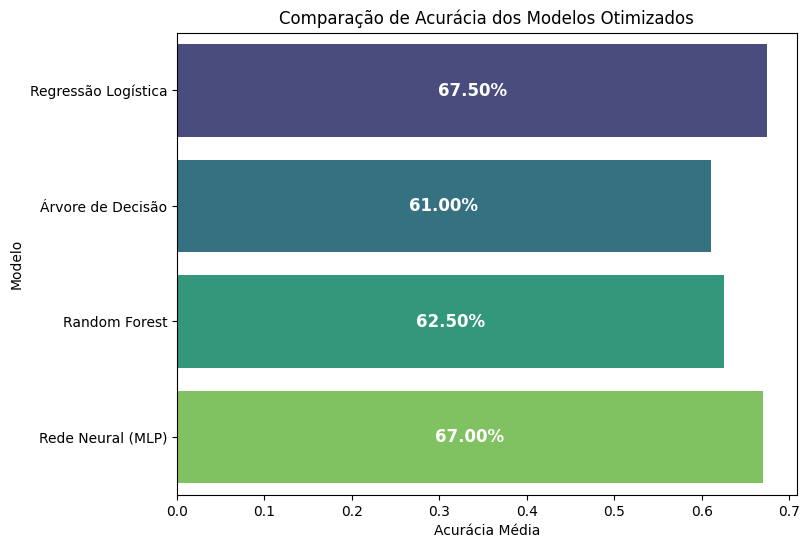

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


resultados_otimizados = []

# Definindo os modelos e seus hiperparâmetros para busca
modelos_com_parametros = {
    "Regressão Logística": {
        "modelo": LogisticRegression(random_state=42),
        "parametros": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "Árvore de Decisão": {
        "modelo": DecisionTreeClassifier(random_state=42),
        "parametros": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "modelo": RandomForestClassifier(random_state=42),
        "parametros": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "Rede Neural (MLP)": {
        "modelo": MLPClassifier(random_state=42, max_iter=1000),
        "parametros": {
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "alpha": [0.0001, 0.001, 0.01]
        }
    }
}

# Número de folds para a validação cruzada
k_folds = 5

print("=================================================================")
print("Resultados da Validação Cruzada com Ajuste de Hiperparâmetros::")
print("\n| Modelo                  | Melhor Acurácia | Desvio Padrão | Melhor Configuração |")
print("|-------------------------|----------------|---------------|----------------------|")

# Aplicando GridSearchCV para cada modelo
for nome, dados in modelos_com_parametros.items():
    modelo = dados["modelo"]
    parametros = dados["parametros"]

    # Realizando busca em grade
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=k_folds, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    melhor_modelo = grid_search.best_estimator_
    melhor_acuracia = grid_search.best_score_
    melhor_parametros = grid_search.best_params_

    resultados_otimizados.append({
        "Modelo": nome,
        "Acurácia Média": melhor_acuracia,
        "Melhor Configuração": melhor_parametros
    })

    print(f"| {nome:<23} | {melhor_acuracia:<14.4f} | {grid_search.cv_results_['std_test_score'][grid_search.best_index_]:<13.4f} | {melhor_parametros} |")

print("=================================================================")

df_resultados_otimizados = pd.DataFrame(resultados_otimizados)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Acurácia Média', y='Modelo', data=df_resultados_otimizados, palette='viridis')
plt.title("Comparação de Acurácia dos Modelos Otimizados")
plt.xlabel("Acurácia Média")
plt.ylabel("Modelo")

for p in ax.patches:
    ax.annotate(f'{p.get_width()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=12, color='white', weight='bold')

plt.show()


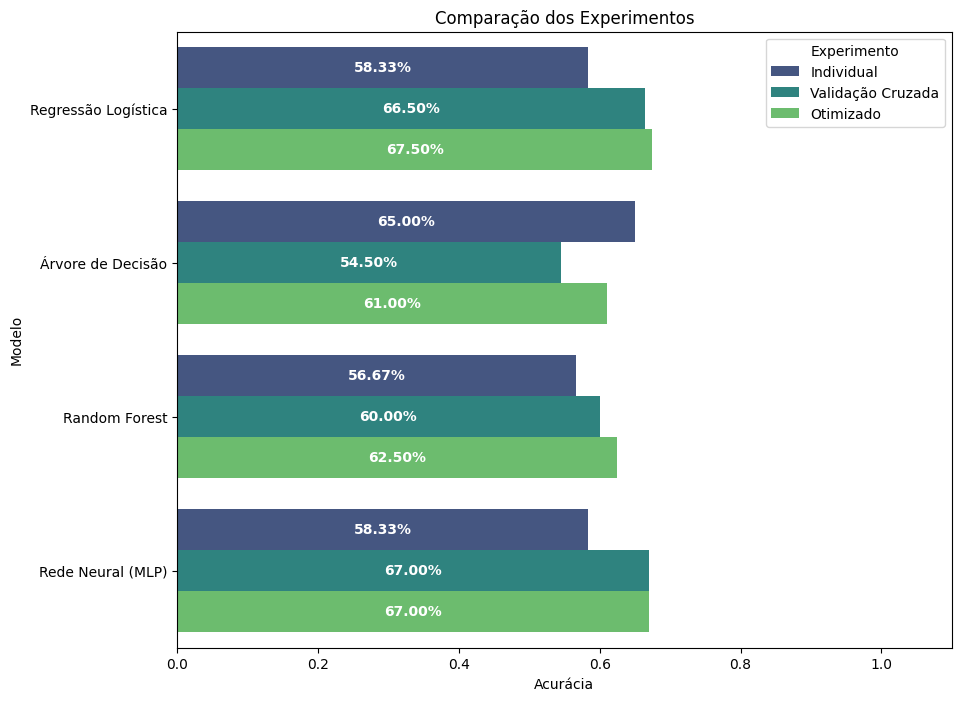

In [ ]:
resultados_completos = []

# Adicionando resultados individuais
for resultado in resultados:
    resultados_completos.append({
        "Modelo": resultado["Modelo"],
        "Experimento": "Individual",
        "Acurácia": resultado["Acurácia"]
    })

# Adicionando resultados de validação cruzada
for resultado in resultados_cv:
    resultados_completos.append({
        "Modelo": resultado["Modelo"],
        "Experimento": "Validação Cruzada",
        "Acurácia": resultado["Acurácia Média"]
    })

# Adicionando resultados otimizados
for resultado in resultados_otimizados:
    resultados_completos.append({
        "Modelo": resultado["Modelo"],
        "Experimento": "Otimizado",
        "Acurácia": resultado["Acurácia Média"]
    })

df_resultados_completos = pd.DataFrame(resultados_completos)

# Plotando o gráfico comparativo
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=df_resultados_completos,
    x="Acurácia",
    y="Modelo",
    hue="Experimento",
    palette="viridis"
)

plt.title("Comparação dos Experimentos")
plt.xlabel("Acurácia")
plt.ylabel("Modelo")
plt.xlim(0, 1.1)

for p in ax.patches:
    width = p.get_width()
    if width > 0.005:
        ax.annotate(f'{p.get_width()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='white', weight='bold')

plt.legend(title="Experimento")
plt.show()


Podemos observar que, assim como na análise realizada apenas com a validação cruzada, os melhores modelos permanecem os mesmos: a **Regressão Logística** e a **Rede Neural**.

- **Regressão Logística**
  - Com CV: 66,50%
  - Com CV e Ajuste: 67,50%

- **Rede Neural**
  - Com CV: 67%
  - Com CV e Ajuste: 67%


Vale resaltar a grande melhora obtida nos demais modelos, que tiveram uma certa melhora em comparacao a analise anterior:

- **Árvore de Decisão**
  - Com CV: 54,50%
  - Com CV e Ajuste: 61%

- **Random Forest**
  - Com CV: 60%
  - Com CV e Ajuste: 62,50%

Podemos observar que, no modelo de **árvore de decisão**, a maior acurácia foi obtida na divisão simples dos dados. Isso pode estar relacionado a um caso de **overfitting**, onde o modelo se ajusta excessivamente aos dados de treino, capturando padrões específicos que não se generalizam bem para novos conjuntos de dados.

Essa situação pode ocorrer porque, na divisão simples, o modelo é avaliado em um único conjunto de teste, o que pode levar a resultados superestimados devido à falta de validação em múltiplos subconjuntos, como ocorre na validação cruzada.

## **Conclusão**
Os resultados demonstraram que, com a aplicação da validação cruzada e ajuste de hiperparâmetros, houve uma melhoria significativa no desempenho dos modelos, principalmente nos casos de **Árvore de Decisão** e **Random Forest**, que apresentaram aumentos consideráveis na acurácia.

No entanto, os modelos **Regressão Logística** e **Rede Neural** mantiveram-se como os de melhor desempenho, com a Rede Neural apresentando uma acurácia constante em ambas as análises.

Isso reforça a importância do ajuste de hiperparâmetros na otimização de modelos, afim de gerar modelos mais otimizados e acertivos.




---



# **5. Interpretação Resultados**

Nesta etapa do nosso projeto, realizamos a análise detalhada dos modelos de aprendizado de máquina que foram desenvolvidos. O objetivo dessa análise é entender como os modelos tomam suas decisões, quais variáveis têm maior impacto nas previsões e avaliar a performance do modelo utilizando diferentes métricas.

Uma primeira abordagem realizada foi identificar quais features são mais influentes nas previsões do modelo. Para cada tipo de modelo utilizado, foram aplicadas diferentes técnicas para essa análise.

- **Regressão Logística**
  - A interpretação é feita pelos coeficientes dos parâmetros do modelo, onde cada coeficiente representa a influência de uma variável na probabilidade de uma classe, sendo positivo ou negativo, e a magnitude do coeficiente indica o quanto ele impacta a previsão.
  - ***Interpretação***:
    - Coeficiente positivo: Aumenta a probabilidade de a classe ser 1 (compra).
    - Coeficiente negativo: Diminui a probabilidade de a classe ser 1 (compra).
    - Maior valor absoluto: Indica maior influência.





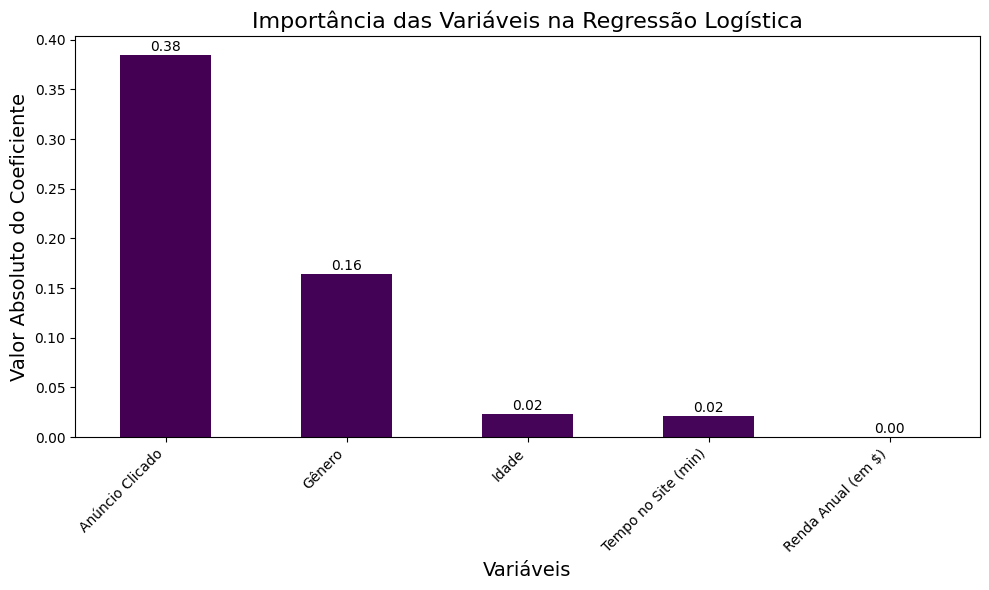

In [ ]:
# Coeficientes da regressão logística
coeficientes = pd.DataFrame(modelo_logistica.coef_.flatten(), index=X.columns, columns=['Coeficiente'])
coeficientes['Abs Coeficiente'] = coeficientes['Coeficiente'].abs()

coeficientes_sorted = coeficientes.sort_values(by='Abs Coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
bars = coeficientes_sorted['Abs Coeficiente'].plot(kind='bar', color=plt.cm.viridis(range(len(coeficientes_sorted))))

for i, v in enumerate(coeficientes_sorted['Abs Coeficiente']):
    bars.text(i, v + 0.015, f'{v:.2f}', ha='center', va='top', fontsize=10, color='black')

plt.title('Importância das Variáveis na Regressão Logística', fontsize=16)
plt.xlabel('Variáveis', fontsize=14)
plt.ylabel('Valor Absoluto do Coeficiente', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Árvore de Decisão**
  - **modelo_arvore.feature_importances_** é um método do modelo de Árvore de Decisão que contém a importância de cada uma das variáveis/features usadas no modelo.
  - Esse método retorna um vetor com a importância relativa de cada variável.
  - O valor de cada elemento do vetor está entre 0 e 1, e a soma das importâncias de todas as variáveis será igual a 1

    - ***Interpretação***:
      - **Maior valor de importância** significa que a variável tem mais influência na decisão do modelo.
      - **Menor valor de importância** significa que a variável tem menor influência na decisão do modelo.
 - A título de curiosidade, conseguimos plotar a cara dessa Árvores de Decisão

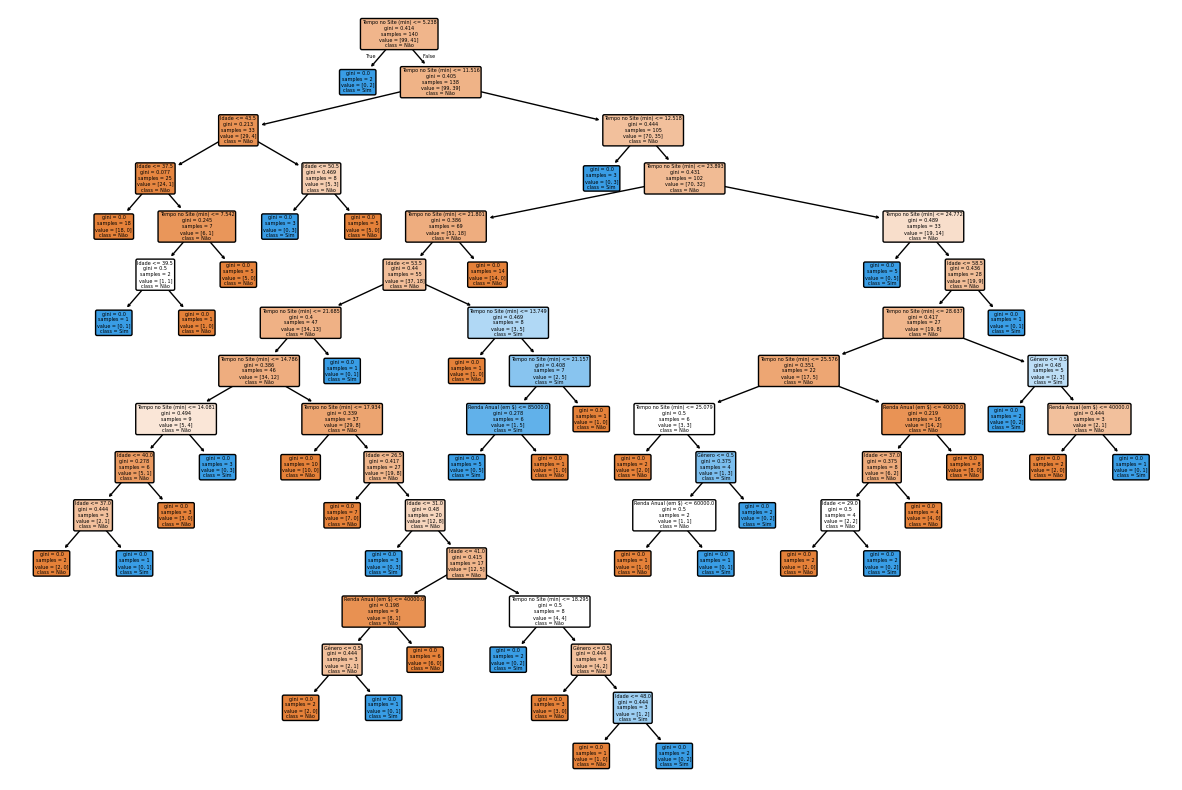

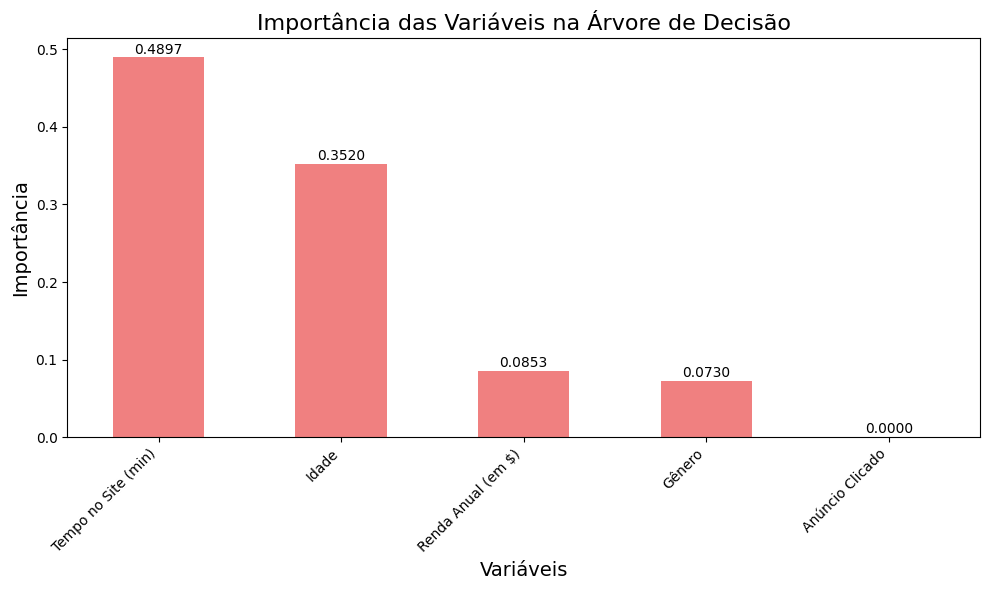

In [ ]:
from sklearn.tree import plot_tree

# Plotando a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=["Não", "Sim"], rounded=True)
plt.show()

print()

# Importância das variáveis no modelo de Árvore de Decisão
importancia_arvore = modelo_arvore.feature_importances_

importancia_df_arvore = pd.DataFrame(importancia_arvore, index=X.columns, columns=['Importância']).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
ax = importancia_df_arvore['Importância'].plot(kind='bar', color='lightcoral')

for p in ax.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()

    ax.text(x_pos, y_pos + 0.001, f'{y_pos:.4f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Importância das Variáveis na Árvore de Decisão', fontsize=16)
plt.xlabel('Variáveis', fontsize=14)
plt.ylabel('Importância', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- **Random Forest**
  - O Random Forest também fornece a importância das variáveis, logo podemos visualizá-la de maneira semelhante à Árvore de Decisão, usando um gráfico de barras.
  - A interpretação segue a mesma logica da usada na Árvores de Decisão.


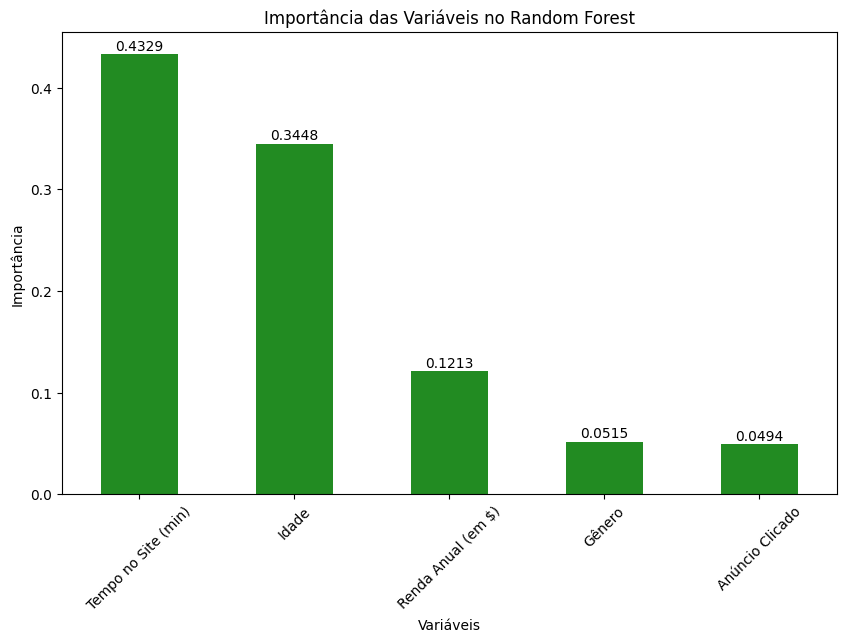

In [ ]:
# Importância das variáveis no modelo Random Forest
importancia_rf = modelo_rf.feature_importances_

importancia_df_rf = pd.DataFrame(importancia_rf, index=X.columns, columns=['Importância']).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
ax = importancia_df_rf['Importância'].plot(kind='bar', color='forestgreen')

for i, v in enumerate(importancia_df_rf['Importância']):
    ax.text(i, v + 0.001, round(v, 4), ha='center', va='bottom')

plt.title('Importância das Variáveis no Random Forest')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.xticks(rotation=45)
plt.show()

- **MLP**
  - Redes neurais, em geral, não têm uma medida explícita de "importância das variáveis" como os modelos anteriores.
  - No entanto, existem algumas abordagens que você pode usar para entender a contribuição das variáveis em um modelo de rede neural MLP, irei usar a referente aos pesos das camadas.
  - **Abordagem usando os pesos das camadas da rede neural**
    - Sabemos que o MLP tem pesos associados a cada conexão entre os neurônios. Esses pesos podem ser usados para estimar a importância das variáveis, especialmente na camada de entrada.
    - Isso é, **quanto maior o peso** associado a uma variável de entrada, **maior** a sua contribuição para a decisão da rede neural.

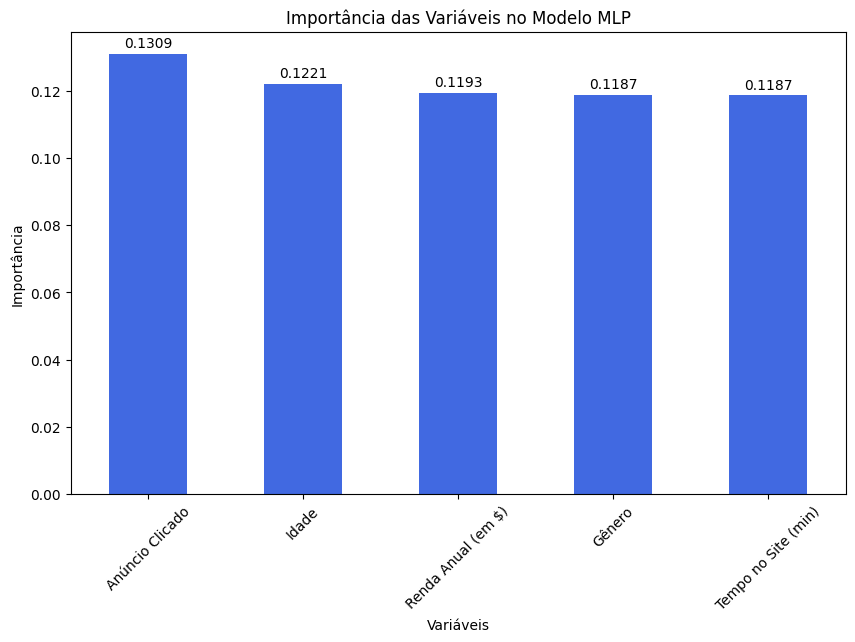

In [ ]:
# Pegando os pesos da camada de entrada
pesos = modelo_mlp.coefs_[0]


variaveis = X.columns

# Calculando a média do valor absoluto dos pesos por variável
importancia_variaveis = np.abs(pesos).mean(axis=1)

importancia_df = pd.DataFrame(importancia_variaveis, index=variaveis, columns=['Importância']).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))
ax = importancia_df['Importância'].plot(kind='bar', color='royalblue')

for i, v in enumerate(importancia_df['Importância']):
    ax.text(i, v + 0.001, round(v, 4), ha='center', va='bottom')

plt.title('Importância das Variáveis no Modelo MLP')
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.xticks(rotation=45)
plt.show()

Analisando os resultados, observamos que os modelos com melhor desempenho, o **MLP** e a **Regressão Logística**, têm um fator em comum. A característica mais influente em ambos os modelos é o "***Anúncio Clicado***" .

Em resumo, ao analisar a importância das variáveis para os diferentes modelos, foi possível identificar que o **Anúncio Clicado** teve um impacto significativo na previsão da conversão para os modelos de melhor desempenho (Regressão Logística e MLP), destacando seu papel crucial no processo de decisão.

Por outro lado, para os modelos com desempenho inferior (Árvore de Decisão e Random Forest), a variável **Tempo no Site** apareceu como a mais influente, embora sua relevância não seja tão clara quando comparamos com os resultados dos modelos mais robustos.

Isso sugere que o Tempo no Site não é, de fato, um preditor forte para a conversão em vendas, e seu impacto pode ser superestimado em modelos menos eficazes.



---



# **6. Conclusão**

Este projeto teve como objetivo desenvolver e avaliar diferentes modelos de machine learning para prever a probabilidade de um cliente realizar a compra de um imóvel com base em um conjunto de características. Através do uso de técnicas como validação cruzada e ajuste de hiperparâmetros, conseguimos otimizar e comparar a performance de diversos algoritmos, incluindo **Regressão Logística**, **Árvore de Decisão**, **Random Forest** e **Rede Neural (MLP)**.

Para uma conclusão mais completa, ler o README.